In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def grad_U(Ui, Yij, Vj, reg, eta):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    return eta * (reg * Ui - Vj * (Yij - np.dot(Ui, Vj)))

def grad_V(Vj, Yij, Ui, reg, eta):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    return eta * (reg * Vj - Ui * (Yij - np.dot(Ui, Vj)))


def get_err(U, V, Y, reg=0.0):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V.
    """
    reg_err = reg * (np.linalg.norm(U)**2 + np.linalg.norm(V)**2)
    squ_err = 0
    for row in Y:
        ii = row[0] - 1
        jj = row[1] - 1
        squ_err += (row[2] - np.dot(U[ii], V[jj])) ** 2
    return 1/2 * (reg_err + squ_err) / len(Y)

                      


def train_model(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300):
    import time
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and K x N matrix V such that rating Y_ij is approximated
    by (UV^T)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """
    import pdb
    U = np.random.uniform(-.5, .5, size=(M, K))
    V = np.random.uniform(-.5, .5, size=(N, K))
    err0 = get_err(U, V, Y)
    n_epochs = 0
    

    t_ep = 0
    errs = []
    while n_epochs < max_epochs:
        t_grad = 0
        t_err = 0
        n_epochs += 1
        print(n_epochs)
        start_ep=time.time()
        for row in np.random.permutation(len(Y)):
            ii = Y[row][0] - 1
            jj = Y[row][1] - 1
            Yij = Y[row][2]
            oldU = np.copy(U[ii])
            oldV = np.copy(V[jj])
            start = time.time()
            U[ii] = oldU - grad_U(oldU, Yij, oldV, reg, eta)
            V[jj] = oldV - grad_V(oldV, Yij, oldU, reg, eta)
            t_grad += time.time() - start
        st_err = time.time()
        errs.append(get_err(U, V, Y, reg))
        t_err +=  time.time() - st_err
        #pdb.set_trace()
        if n_epochs == 1:
            err0 = errs[0]/err0
        else:
            if (errs[-2] - errs[-1])/err0 < eps:
                break
        print(t_grad, t_err, time.time() - start_ep)
    return (U, V, get_err(U, V, Y, reg))
        
                                                                   

In [3]:
Y_train = np.loadtxt('data/train.txt').astype(int)
Y_test = np.loadtxt('data/test.txt')	.astype(int)

M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies
Ks = [10,20,30,50]

regs = [10**-3, 10**-2, 10**-1]
regs = [10**-3, 10**-2, 10**-1]

eta = 0.03 # learning rate
#E_ins = []
#E_outs = []

# Use to compute Ein and Eout
for reg in regs:
    E_ins_for_lambda = []
    E_outs_for_lambda = []

    for k in Ks:
        print("Training model with M = %s, N = %s, k = %s, eta = %s, reg = %s"%(M, N, k, eta, reg))
        U,V, e_in = train_model(M, N, k, eta, reg, Y_train)
        E_ins_for_lambda.append(e_in)
        eout = get_err(U, V, Y_test)
        E_outs_for_lambda.append(eout)

    E_ins.append(E_ins_for_lambda)
    E_outs.append(E_outs_for_lambda)


# Plot values of E_in across k for each value of lambda
for i in range(len(regs)):
    plt.plot(Ks, E_ins[i], label='$E_{in}, \lambda=$'+str(regs[i]))
plt.title('$E_{in}$ vs. K')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend()
plt.savefig('2e_ein.png')
plt.clf()

# Plot values of E_out across k for each value of lambda
for i in range(len(regs)):
    plt.plot(Ks, E_outs[i], label='$E_{out}, \lambda=$'+str(regs[i]))
plt.title('$E_{out}$ vs. K')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend()
plt.savefig('2e_eout.png')

Training model with M = 943, N = 1682, k = 10, eta = 0.03, reg = 0.001
1
3.0169832706451416 0.8909695148468018 5.13373875617981
2
3.1651229858398438 0.898956298828125 5.106851816177368
3
3.138507843017578 0.9593932628631592 5.159860849380493
4
3.005288600921631 0.8380379676818848 5.001224994659424
5
3.047844409942627 0.8388614654541016 5.063847064971924
6
2.726287364959717 0.8750419616699219 5.0142529010772705
7
3.004605770111084 0.8590388298034668 5.026601791381836
8
3.193763494491577 0.8685696125030518 5.290093660354614
9
3.1215925216674805 0.9849331378936768 5.196939945220947
10
3.188924551010132 0.9256701469421387 5.099239349365234
11
3.200913190841675 0.8293824195861816 5.335917234420776
12
3.0783488750457764 0.9447164535522461 5.180936336517334
13
3.144362449645996 0.8727090358734131 5.255297899246216
14
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.001
1
3.0859756469726562 0.8751864433288574 5.020316123962402
2
3.218640089035034 0.8596177101135254 5.18485450

2.3250198364257812 0.6302745342254639 3.541614294052124
28
2.1255202293395996 0.5833184719085693 3.526451587677002
29
2.183239221572876 0.6145193576812744 3.5142297744750977
30
2.1715872287750244 0.6562848091125488 3.568552017211914
31
2.1014904975891113 0.6145141124725342 3.508681535720825
32
Training model with M = 943, N = 1682, k = 50, eta = 0.03, reg = 0.01
1
1.9408636093139648 0.6291580200195312 3.5370523929595947
2
1.930983066558838 0.6664400100708008 3.5873990058898926
3
2.2045822143554688 0.625079870223999 3.563157320022583
4
2.176917791366577 0.6406941413879395 3.598172426223755
5
2.199394464492798 0.6164934635162354 3.604454278945923
6
2.2393009662628174 0.6583850383758545 3.7237558364868164
7
2.3906033039093018 0.6728975772857666 3.8047471046447754
8
2.227836847305298 0.6172475814819336 3.692434549331665
9
2.0418202877044678 0.5987808704376221 3.5349771976470947
10
2.165705680847168 0.5944230556488037 3.5326995849609375
11
2.2287893295288086 0.6559553146362305 3.63927650451

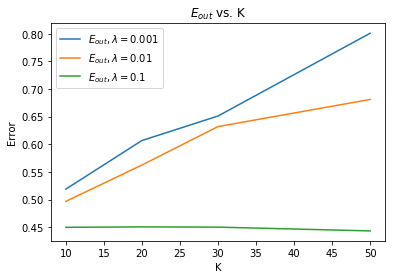

In [4]:
plt.show()